## Getting Returns from Price

Can use the `pct_change` function to get returns. While doing so, drop the first element after doing this, as it will be `NaN`

In [8]:
adbe_df = pd.read_csv("/Users/brendan/Desktop/Python/BoostedAI/prices/ADBE.csv")
adbe_df = adbe_df[::-1]
adbe_df.head()

,Unnamed: 0,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Ticker
1257,1257,2017-07-31,146.36,146.91,145.06,146.49,146.49,2182100.0,2182100.0,0.13,0.089,146.15333,"July 31, 17",0.00089,ADBE
1256,1256,2017-08-01,147.48,147.65,146.52,147.36,147.36,1580300.0,1580300.0,-0.12,-0.081,147.17667,"August 01, 17",-0.00081,ADBE
1255,1255,2017-08-02,147.56,147.60,144.52,147.13,147.13,2112000.0,2112000.0,-0.43,-0.291,146.41667,"August 02, 17",-0.00291,ADBE
1254,1254,2017-08-03,147.47,147.98,145.68,147.79,147.79,1510600.0,1510600.0,0.32,0.217,147.15000,"August 03, 17",0.00217,ADBE
1253,1253,2017-08-04,148.25,148.62,147.27,147.71,147.71,1503500.0,1503500.0,-0.54,-0.364,147.86667,"August 04, 17",-0.00364,ADBE


In [11]:
R = adbe_df['adjClose'].pct_change()[1:]
adbe_df['pct_change'] = adbe_df['adjClose'].pct_change()[1:]
adbe_df.tail()

,Unnamed: 0,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Ticker,pct_change
4,4,2022-07-22,410.03,414.62,398.63,401.90,401.90,2412742.0,2412742.0,-8.13,-1.983,405.05000,"July 22, 22",-0.01983,ADBE,-0.017143
3,3,2022-07-25,400.11,400.77,388.57,391.96,391.96,2337274.0,2337274.0,-8.15,-2.037,393.76667,"July 25, 22",-0.02037,ADBE,-0.024733
2,2,2022-07-26,393.58,393.58,378.16,379.26,379.26,2361515.0,2361515.0,-14.32,-3.638,383.66667,"July 26, 22",-0.03638,ADBE,-0.032401
1,1,2022-07-27,385.08,394.91,383.41,392.78,392.78,2678143.0,2678143.0,7.70,2.000,390.36667,"July 27, 22",0.02000,ADBE,0.035648
0,0,2022-07-28,392.76,406.15,390.06,403.50,403.50,2418942.0,2418942.0,10.74,2.734,399.90333,"July 28, 22",0.02734,ADBE,0.027293


In [12]:
adbe_df.head(2)

,Unnamed: 0,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Ticker,pct_change
1257,1257,2017-07-31,146.36,146.91,145.06,146.49,146.49,2182100.0,2182100.0,0.13,0.089,146.15333,"July 31, 17",0.00089,ADBE,NaN
1256,1256,2017-08-01,147.48,147.65,146.52,147.36,147.36,1580300.0,1580300.0,-0.12,-0.081,147.17667,"August 01, 17",-0.00081,ADBE,0.005939


Can plot the returns distribution as a histogram:

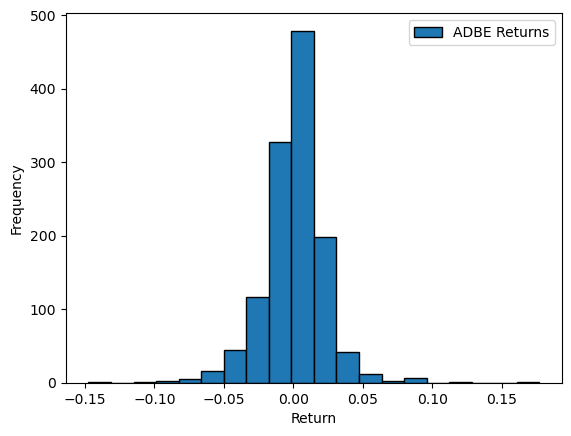

In [14]:
import matplotlib.pyplot as plt
plt.hist(R, bins=20,ec='black')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['ADBE Returns'])
plt.show()

Get statistics again:

In [18]:
import numpy as np
np.mean(R), np.std(R)

(0.001062896047655594, 0.02264158843454743)

Now go backwards and generate data out of a normal distribution using the statistics estimated from ADBE returns. The returns are unlikely to be normal.

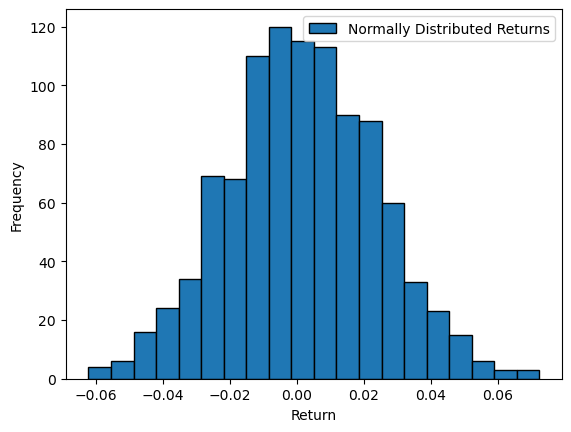

In [20]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 1000), bins=20, ec='black')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns'])
plt.show()

## Generating a Moving Average

**`pandas`** has some nice tools that allow to generate rolling statistics. In the below example, there is no moving average for the first 60 days - do not yet have 60 days of data

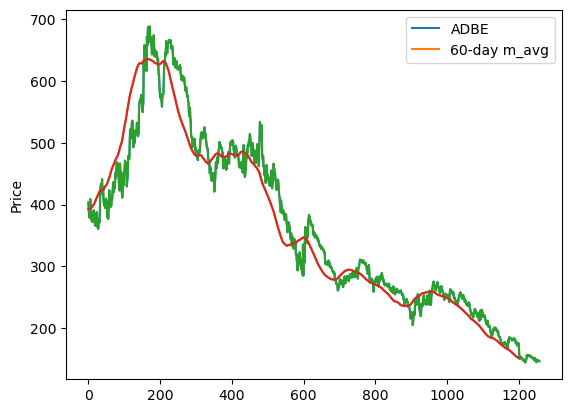

In [28]:
X = adbe_df['adjClose']
m_avg = adbe_df['adjClose'].rolling(60).mean()
plt.plot(X.index, X.values)
plt.plot(m_avg.index, m_avg.values)
plt.ylabel('Price')
plt.legend(['ADBE', '60-day m_avg'])
plt.show()